In [1]:
#import liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#collecting and load the data
df=pd.read_csv("Amazon Sale Report.csv",encoding='unicode_escape')

In [3]:
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN


## Data Cleaning

In [4]:
df.shape

(128976, 21)

In [5]:
#checking null values in dataset
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [6]:
#drop blanked columns
df.drop(["New","PendingS"],axis=1,inplace=True)

In [7]:
df.shape

(128976, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
#drop null values
df.dropna(inplace=True)

In [10]:
df.shape

(37514, 19)

In [11]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [12]:
#change datatype
df['ship-postal-code']=df['ship-postal-code'].astype('int')
df['Date']=pd.to_datetime(df['Date'])

C:\Users\gajen\AppData\Local\Temp\ipykernel_7896\2417050161.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [13]:
df['Date'].dtype

dtype('<M8[ns]')

In [14]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [15]:
df[['Amount','Qty']].describe()

,Amount,Qty
count,37514.000000,37514.000000
mean,646.553960,0.867383
std,279.952414,0.354160
min,0.000000,0.000000
25%,458.000000,1.000000
50%,629.000000,1.000000
75%,771.000000,1.000000
max,5495.000000,5.000000


# EDA

In [16]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

### SIZE

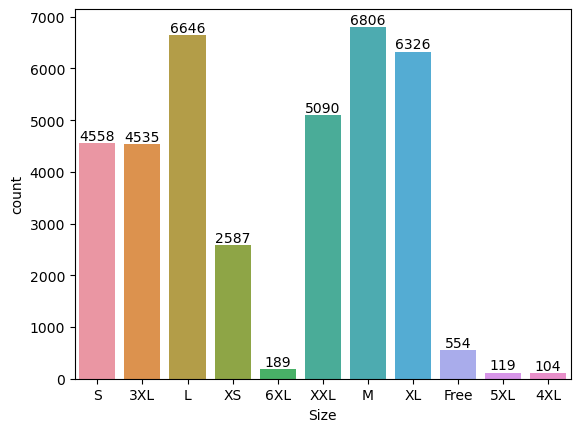

In [17]:
ax=sns.countplot(x='Size',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Size', ylabel='Amount'>

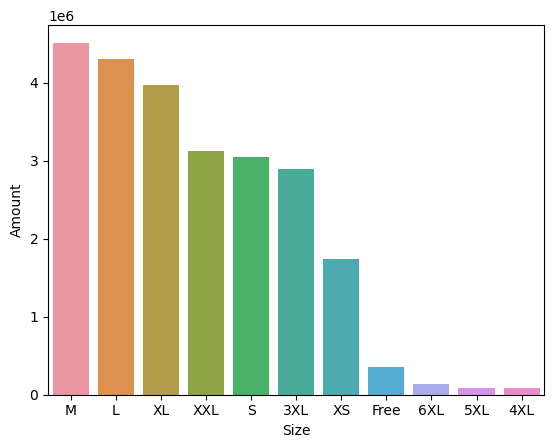

In [18]:
sales_size=df.groupby(['Size'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Size',y='Amount',data=sales_size)

### From above charts we can see that most sales by size of medium,Large,XL

## Courier Status

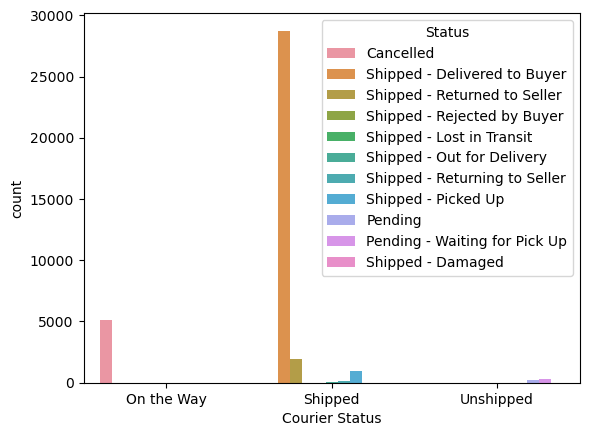

<Figure size 1000x500 with 0 Axes>

In [19]:
ax=sns.countplot(x='Courier Status',hue='Status',data=df)
plt.figure(figsize=(10,5))
plt.show()

### So we can see that majority of the orders are shipped through the carrier

## Category

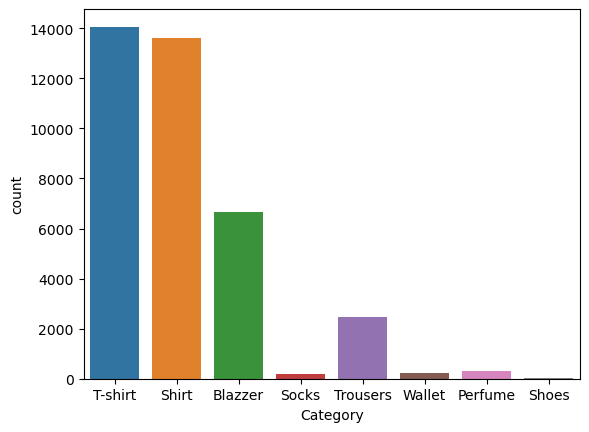

In [20]:
ax=sns.countplot(x='Category',data=df)

<Axes: xlabel='Category', ylabel='Amount'>

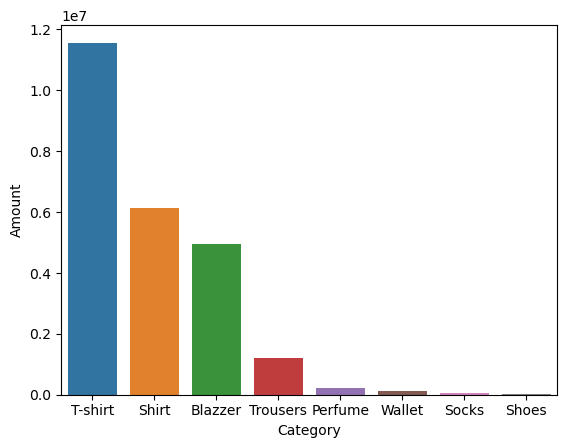

In [21]:
sales_category=df.groupby(['Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Category',y='Amount',data=sales_category)

### From above we can see that most of buyer are buys T-Shirts Category

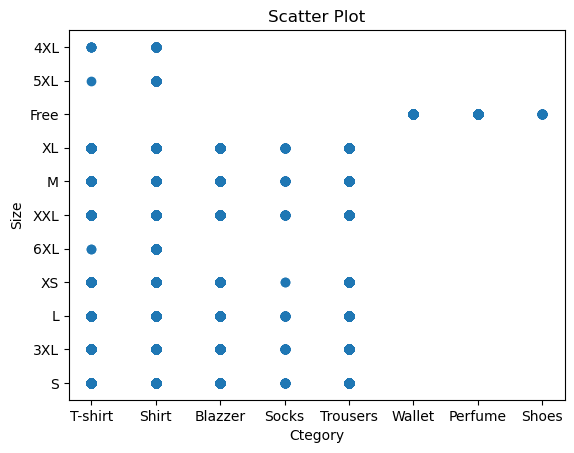

In [22]:
##prepare data for scatter plot
x_data=df['Category']
y_data=df['Size']

plt.scatter(x_data,y_data)
plt.xlabel('Ctegory')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()

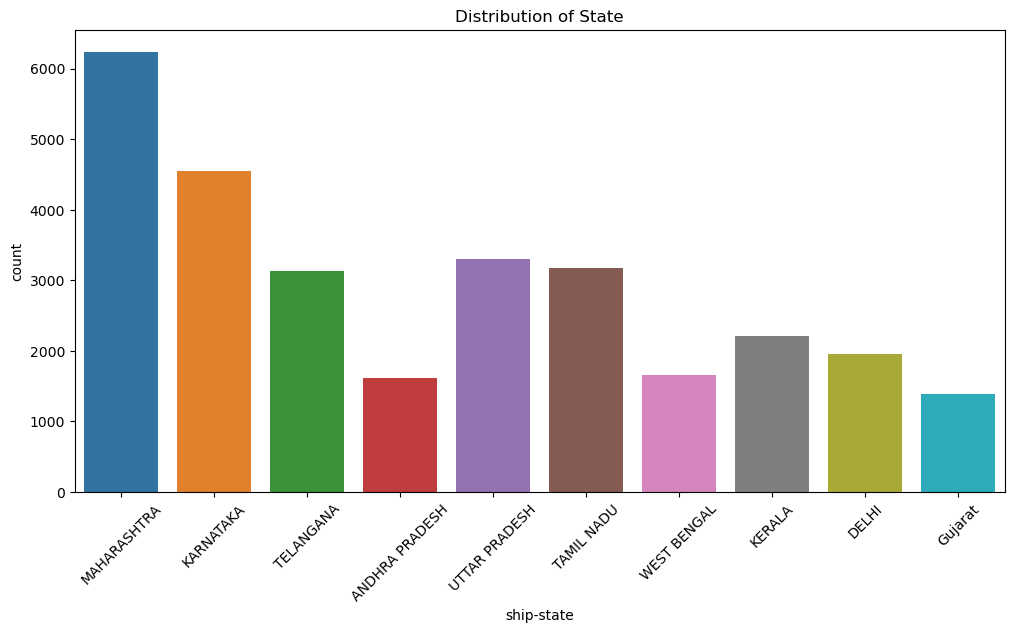

In [23]:
# top 10 sates
top_10_state=df['ship-state'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)],x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=45)
plt.show()

### Note: From above Graph you can see that most of the  buyers are Maharashtra state

## CONCLUSION

### The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.